

Exercise: train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

Let's use the Iris dataset: the Iris Setosa and Iris Versicolor classes are linearly separable

### Import and scale data

In [21]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Visualize data

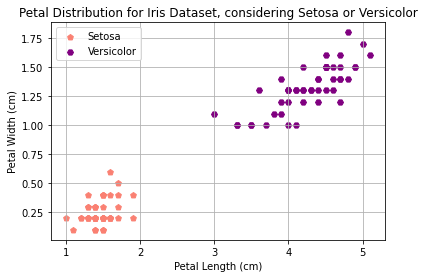

In [41]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="p", c="salmon", label="Setosa")
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="H", c="purple", label="Versicolor")
plt.grid(True, which="both")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Petal Distribution for Iris Dataset, considering Setosa or Versicolor")
plt.legend()

### First attempt to train models

In [23]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

linearSVC = LinearSVC(C=1, loss="hinge")
svc = SVC(kernel="linear", C=1)
sgd = SGDClassifier(loss="hinge")

linearSVC.fit(X_scaled, y)
svc.fit(X_scaled, y)
sgd.fit(X_scaled, y)

print("Done!")

Done!


### First comparison between models

In [24]:
from sklearn.metrics import accuracy_score

print("LinearSVC accuracy: {:.0f}%".format(100*accuracy_score(y, linearSVC.predict(X_scaled))))
print("SVC accuracy: {:.0f}%".format(100*accuracy_score(y, svc.predict(X_scaled))))
print("SGD accuracy: {:.0f}%".format(100*accuracy_score(y, sgd.predict(X_scaled))))

LinearSVC accuracy: 100%
SVC accuracy: 100%
SGD accuracy: 100%


Super overfit alert?

### Visualize the support vector

This will enable us to get a grasp of how the models are actually behaving.

(0.0, 5.0, 0.0, 2.0)

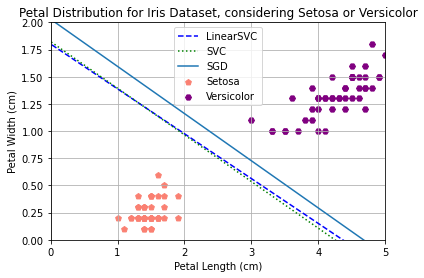

In [42]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="p", c="salmon", label="Setosa")
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="H", c="purple", label="Versicolor")
plt.grid(True, which="both")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Petal Distribution for Iris Dataset, considering Setosa or Versicolor")

# Compute the slope and bias of each model
a1 = -linearSVC.coef_[0,0]/linearSVC.coef_[0,1]
b1 = -linearSVC.intercept_[0]/linearSVC.coef_[0,1]
a2 = -svc.coef_[0,0]/svc.coef_[0,1]
b2 = -svc.intercept_[0]/svc.coef_[0,1]
a3 = -sgd.coef_[0,0]/sgd.coef_[0,1]
b3 = -sgd.intercept_[0]/sgd.coef_[0,1]

linplot = scaler.inverse_transform([[-10, -10 * a1 + b1], [10, 10 * a1 + b1]])
svcplot = scaler.inverse_transform([[-10, -10 * a2 + b2], [10, 10 * a2 + b2]])
sgdplot = scaler.inverse_transform([[-10, -10 * a3 + b3], [10, 10 * a3 + b3]])

plt.plot(linplot[:, 0], linplot[:, 1], "b--", label="LinearSVC")
plt.plot(svcplot[:, 0], svcplot[:, 1], "g:", label="SVC")
plt.plot(sgdplot[:, 0], sgdplot[:, 1], label="SGD")

plt.legend()
plt.axis([0, 5, 0, 2])

I guess this is close enough